# Exploration Notebook: Live BTC/USDT Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from data_fetcher import fetch_recent_candles

In [2]:
df = fetch_recent_candles(symbol='BTCUSDT', limit=500, interval='1m')
df['close'] = df['close'].astype(float)

In [3]:
df['MA20'] = df['close'].rolling(window=20).mean()
df['MA50'] = df['close'].rolling(window=50).mean()

In [4]:
delta = df['close'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
window = 14
roll_up = gain.rolling(window).mean()
roll_down = loss.rolling(window).mean()
rs = roll_up / roll_down
df['RSI'] = 100 - (100 / (1 + rs))

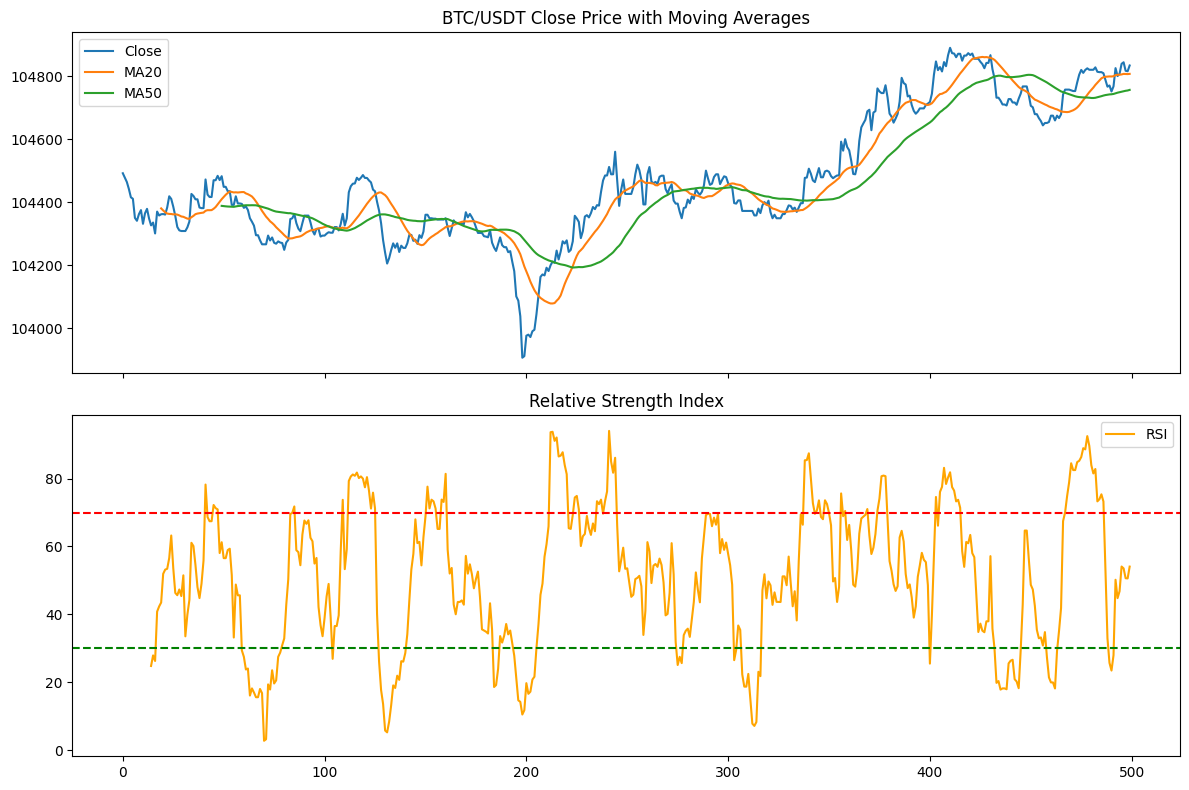

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
ax[0].plot(df['close'], label='Close')
ax[0].plot(df['MA20'], label='MA20')
ax[0].plot(df['MA50'], label='MA50')
ax[0].set_title('BTC/USDT Close Price with Moving Averages')
ax[0].legend()
ax[1].plot(df['RSI'], label='RSI', color='orange')
ax[1].axhline(70, color='red', linestyle='--')
ax[1].axhline(30, color='green', linestyle='--')
ax[1].set_title('Relative Strength Index')
ax[1].legend()
plt.tight_layout()
plt.show()